#Projeto1

**Felipe Goichman e Lucas Borges**

Essa analise de dados da tabela da PNAD(Pesquisa Nacional de Análise de Domicilio) tem como objetivo observar a desigualdade salarial entre homens e mulheres  a partir de gráficos e tabelas.

In [2]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
dados = pd.read_table("pes2013P1.csv.gz", sep=",", compression="gzip")

In [4]:
dados.rename(columns={"V0402":"Ref"}, inplace=True) # Condição na familia

In [5]:
dados.rename(columns={"UF":"Estado"}, inplace=True) # Estado

In [6]:
dados.rename(columns={"V0302":"Gênero"}, inplace=True) # Sexo

In [7]:
dados.rename(columns={"V8005":"Idade"}, inplace=True) # Anos de vida

In [8]:
dados.rename(columns={"V0404":"Cor"}, inplace=True) # Raça

In [9]:
dados.rename(columns={"V9001":"Trabalho"}, inplace=True) # Trabalhou na semana

In [10]:
dados.rename(columns={"V9005":"Num_Trab"}, inplace=True) # Quantos empregos

In [11]:
dados.rename(columns={"V9029":"Niv_Ocup"}, inplace=True) # Cargo no emprego

In [12]:
dados.rename(columns={"V9032":"Setor"}, inplace=True) # Público ou privado

In [13]:
dados.rename(columns={"V9042":"Cart_Asn"}, inplace=True) # Tem carteira assinada

In [14]:
dados.rename(columns={"V9611":"Anos_Trab"}, inplace=True) # Anos empregado

In [15]:
dados.rename(columns={"V4803":"Anos_Est"}, inplace=True) # Quanto tempo estudou

In [16]:
 dados.rename(columns={"V4707":"Horas_Trab"}, inplace=True) # Tempo dedicado ao trabalho durante a semana

In [17]:
dados.rename(columns={"V4745":"Niv_Inst"}, inplace=True)  # Formação acadêmica

In [18]:
dados.rename(columns={"V4718":"Salario"}, inplace=True) # Ordenado

**Grafico do percentual de homens e mulheres na PNAD**

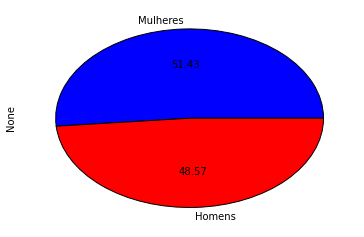

In [19]:
dados.Gênero=dados.Gênero.astype('category')
dados.Gênero.cat.categories = ('Homens', 'Mulheres')
pd.DataFrame.plot(kind='pie', data=dados.Gênero.value_counts(), colors=('blue', 'red'), autopct="%0.2f",legend=False)

**Grafico do percentual de homens e mulheres com a PNAD filtrada**

C:\Users\Lucas Borges\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


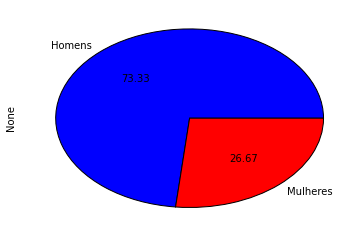

In [20]:
z=dados[(dados.Ref==1)&(dados.Num_Trab==1)&(dados.Cart_Asn==2)&(dados.Niv_Ocup==1)&(dados.Salario<=1000000)]
z.Gênero=z.Gênero.astype('category')
z.Gênero.cat.categories = ('Homens', 'Mulheres')
pd.DataFrame.plot(kind='pie', data=z.Gênero.value_counts(), colors=('blue', 'red'), autopct="%0.2f",legend=False)

Pelos gráficos em pizza podemos perceber que o percentual de mulheres na população brasileira é maior que a dos homens. No entanto, quando se faz uma análise mais profunda (quantos estão empregados, com carteira assinada, é referência na familia), se tem uma intensa diminuição do percentual feminino.

In [21]:
idade = pd.cut(z.Idade, (20, 25, 30, 35, 40, 50, 60), False)
u=idade.value_counts(True)*100
u

[40, 50)    26.038581
[30, 35)    17.339788
[35, 40)    16.176577
[50, 60)    14.511235
[25, 30)    14.099415
[20, 25)     7.293548
dtype: float64

**Gráfico de dispersão entre salário e anos de estudo com ajuste de reta (masculino e feminino**

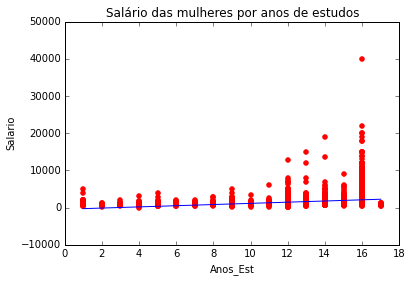

In [22]:
z=dados[(dados.Ref==1)&(dados.Num_Trab==1)&(dados.Cart_Asn==2)&(dados.Niv_Ocup==1)&(dados.Salario<=1000000)&(dados.Gênero=='Mulheres')]
pd.DataFrame.plot(kind='scatter', data=z, x='Anos_Est', y='Salario', color='red', title='Salário das mulheres por anos de estudos')
b = z.Anos_Est.cov(z.Salario) / z.Anos_Est.var()
a = z.Salario.mean() - b * z.Anos_Est.mean()
plt.plot((z.Anos_Est.min(), z.Anos_Est.max()), (a + b * z.Anos_Est.min(), a + b * z.Anos_Est.max()), color='blue')

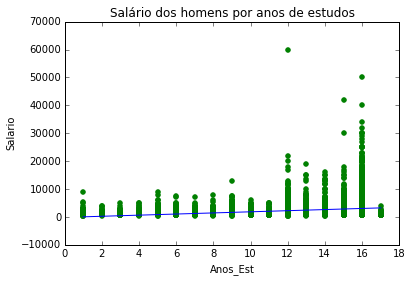

In [23]:
z=dados[(dados.Ref==1)&(dados.Num_Trab==1)&(dados.Cart_Asn==2)&(dados.Niv_Ocup==1)&(dados.Salario<=1000000)&(dados.Gênero=='Homens')]
pd.DataFrame.plot(kind='scatter', data=z, x='Anos_Est', y='Salario', color='green', title='Salário dos homens por anos de estudos')
b = z.Anos_Est.cov(z.Salario) / z.Anos_Est.var()
a = z.Salario.mean() - b * z.Anos_Est.mean()
plt.plot((z.Anos_Est.min(), z.Anos_Est.max()), (a + b * z.Anos_Est.min(), a + b * z.Anos_Est.max()), color='blue')

Outra desigualdade percebida é em relação ao salário entre os gêneros. Notamos que em ambos os casos há um aumento salarial proporcional aos anos de estudos, no entanto percebemos um aumento maior na maior para homens para a mesma quantidade de estudo.

In [24]:
z=dados[(dados.Ref==1)&(dados.Num_Trab==1)&(dados.Cart_Asn==2)&(dados.Niv_Ocup==1)&(dados.Salario<=1000000)]
sal = pd.cut(z.Salario, (0, 800, 2400, 4000, 6400, 9600, 16000, 25000, 50000, 100000), False)
r=sal.value_counts(True)*100

In [25]:
data=pd.crosstab(sal, z.Gênero)

**Grafico de rendimento salarial de homens e mulheres**

C:\Users\Lucas Borges\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


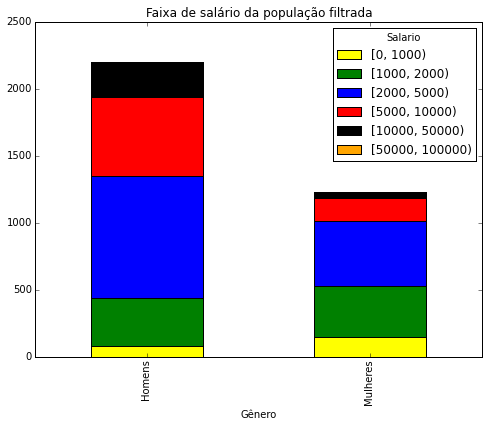

In [26]:
a=dados[(dados.Ref==1)&(dados.Num_Trab==1)&(dados.Cart_Asn==2)&(dados.Niv_Ocup==1)&(dados.Niv_Inst==7)]
sal2 = pd.cut(a.Salario, (0,1000,2000, 5000, 10000, 50000,100000), False)
a.Gênero=a.Gênero.astype('category')
a.Gênero.cat.categories = ('Homens', 'Mulheres')
pd.DataFrame.plot(kind='bar', data=pd.crosstab(a.Gênero, sal2),color=('yellow', 'green', 'blue', 'red', 'black', 'orange','green'),figsize=(8,6), stacked=True, title='Faixa de salário da população filtrada', legend=True)

Neste gráfico podemos perceber em relaçao ao tamanho da barra como é feito a distribuição e concentração salarial para cada um dos gêneros.

In [27]:
q=dados[(dados.Num_Trab==1)&(dados.Cart_Asn==2)&(dados.Niv_Ocup==1)]
q.Gênero=q.Gênero.astype('category')
q.Gênero.cat.categories = ('Homens', 'Mulheres')
o=q.Gênero.value_counts(True)*100

C:\Users\Lucas Borges\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [28]:
v=q.Ref.value_counts(True)*100

In [29]:
ct = pd.crosstab(q.Gênero, q.Ref)

**Gráfico que relaciona o gênero e a pessoa referência da família.**

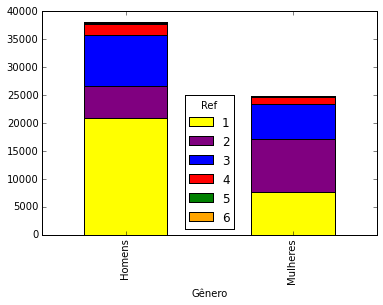

In [30]:
pd.DataFrame.plot(kind='bar', data=pd.crosstab(q.Gênero, q.Ref), color=('yellow', 'purple', 'blue', 'red', 'green', 'orange'), stacked=True)

Agora com outro tipo de gráfico fica mais claro perceber que a maior parte do referêncial que a mulher assume na residência. Usando a legenda (1=Pessoa de Referência; 2=Cônjuge; 3=Filho; 4=Outro partente; 5=Agregado; 6=Pensionista), percebemos que a maioria das mulheres assumem papel de cônjuge, enquanto os homens assumem papel da pessoa de referência).

**Grafico da distribuição salarial porcentual dos homens**

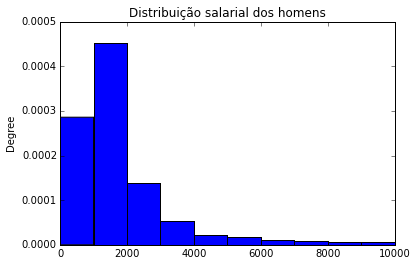

In [31]:
z=dados[(dados.Ref==1)&(dados.Num_Trab==1)&(dados.Cart_Asn==2)&(dados.Niv_Ocup==1)]
faixas = (0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000)
pd.DataFrame.plot(kind='hist', data=z[(z.Gênero=='Homens')].Salario,bins=(0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000),normed=True,legend=False,title="Distribuição salarial dos homens")

**Grafico da distribuição salarial porcentual das mulheres**

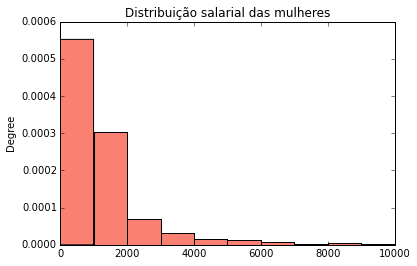

In [32]:
pd.DataFrame.plot(kind='hist', data=z[(z.Gênero=='Mulheres')].Salario,bins=(0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000),normed=True,legend=False,title="Distribuição salarial das mulheres",color=('salmon'))


Considerando o eixo Y como o percentual (multiplicado por 1000), a maior parte dos homens recebem salário maior do que a maior parte das mulheres.

**Box-Plot da distribuição salarial dos homens e mulheres**

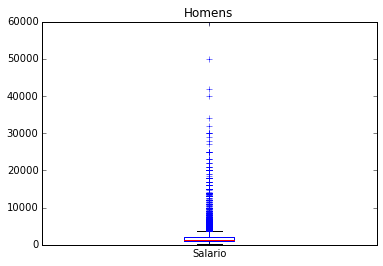

In [33]:
s=dados[(dados.Ref==1)&(dados.Num_Trab==1)&(dados.Cart_Asn==2)&(dados.Niv_Ocup==1)&(dados.Salario<=1000000)]
pd.DataFrame.plot(kind='box', data=s[(s.Gênero=='Homens')].Salario, title='Homens')

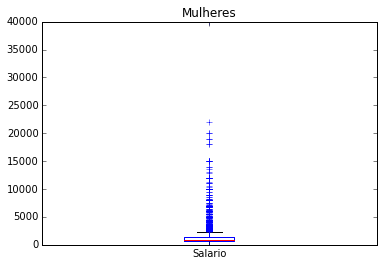

In [34]:
pd.DataFrame.plot(kind='box', data=s[(s.Gênero=='Mulheres')].Salario, title='Mulheres')

A partir da comparação dos boxplots masculinos e femininos podemos observar que os outliers masculinos estão muitos mais dispersos e atingem valores mais altos na distruibuição salarial

**Conclusão**

Como pudemos ver ao longo dessa analise de dados, é muito claro que,infelizmente, há ainda uma grande desigualdade salarial entre homens e mulheres. Algumas mulheres ainda que possuam o mesmo nivel de escolaridade, não possuem o mesmo salario dos homens. Ainda nessa analise pudemos observar que os homens são preponderantemente a pessoa de refereincia, enquanto as mulheres são predominantemente conjugês. Desta forma, devemos tomar novas medidas para tentar equilibrar os salarios entre homens e mulheres, para que no futuro podermos nos tornar uma sociedade homogenea. 